# Dataset Generation
### Author Xuying Ning
Copyright all reserved

In [1]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision import transforms
import numpy as np
import os

In [2]:
#have a folder to store all the tartget images, and another folder for non-target images
os.mkdir('target')
os.mkdir('non_target')

In [3]:
target_train_dir = 'target/train/'
target_val_dir='target/val/'
target_test_dir='target/test/'
os.mkdir(target_train_dir)
os.mkdir(target_val_dir)
os.mkdir(target_test_dir)

In [4]:
non_target_train_dir = 'non_target/train/'
non_target_val_dir='non_target/val/'
non_target_test_dir='non_target/test/'
os.mkdir(non_target_train_dir)
os.mkdir(non_target_val_dir)
os.mkdir(non_target_test_dir)

In [5]:
lfw_dir = "LFW_Folder/lfw_funneled/"

In [6]:
lfw_list = os.listdir(lfw_dir)

<AxesSubplot:>

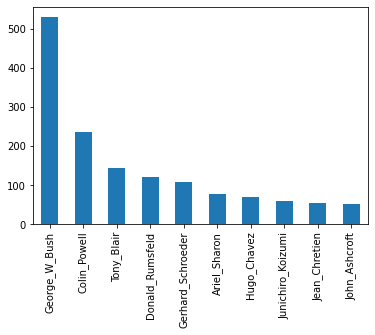

In [8]:
lfw_list = [item for item in lfw_list if not '.txt' in item ]
name_im_c = {}
for name in lfw_list:
    folder_dir = os.path.join(lfw_dir,name)
    img_count = len(os.listdir(folder_dir))
    name_im_c[name] = img_count
name_im_c = pd.Series(name_im_c)
name_im_c.sort_values(ascending=False)[:10].plot(kind='bar')

In [9]:
print('%.2f'%(name_im_c.value_counts().to_dict()[1]/len(lfw_list)))

0.71


In [10]:
least_num = 20
max_num = 80
chosen_name = []
not_chosen_name = []
for item in lfw_list:
    folder_dir = os.path.join(lfw_dir,item)
    img_count = len(os.listdir(folder_dir))
    if img_count >= least_num and img_count <= max_num:
        chosen_name.append(item)
    else:
        not_chosen_name.append(item)
print(len(chosen_name))

57


In [11]:
import numpy as np
np.random.shuffle(chosen_name)
target_names=chosen_name[:50]
non_target=not_chosen_name[:30]

<AxesSubplot:>

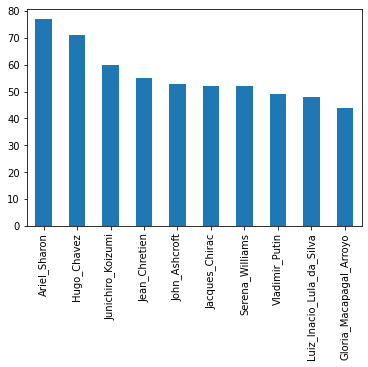

In [12]:
name_im_c = {}
for name in target_names:
    folder_dir = os.path.join(lfw_dir,name)
    img_count = len(os.listdir(folder_dir))
    name_im_c[name] = img_count
name_im_c = pd.Series(name_im_c)
name_im_c.sort_values(ascending=False)[:10].plot(kind='bar')

In [13]:
int(np.average(name_im_c))

34

In [14]:
target_name_csv = pd.DataFrame(target_names)
target_name_csv.to_csv('target_names.csv')

In [15]:
import shutil
base_dir = lfw_dir
device = "cuda" if torch.cuda.is_available() else "cpu"
mtcnn = MTCNN(margin=15, select_largest=False, post_process=False, device='cuda:0')

for target in target_names:
    fold_name= target
    src_folder = os.path.join(base_dir,fold_name)
    img_list=os.listdir(src_folder)
    img_count = len(img_list)
    np.random.shuffle(img_list)
    img_train_list = img_list[:int(0.8*img_count)]
    img_val_list = img_list[int(0.8*img_count):int(0.9*img_count)]
    img_test_list=img_list[int(0.9*img_count):]
    #target_train_set
    for file in img_train_list:
        src_dir =fold_name+'/'+file
        src = os.path.join(base_dir,src_dir)
        dst = os.path.join(target_train_dir,file)
        #crop img and save img
        img = cv2.imread(src)
        frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Detect face
        face = mtcnn(frame)
        # print(type(face))
        face = face.permute(1, 2, 0).int().numpy()
        face = face[...,::-1].copy()
        cv2.imwrite(dst,face)
    
    for file in img_val_list:
        src_dir =fold_name+'/'+file
        src = os.path.join(base_dir,src_dir)
        dst = os.path.join(target_val_dir,file)
        #crop img and save img
        img = cv2.imread(src)
        frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Detect face
        face = mtcnn(frame)
        face = face.permute(1, 2, 0).int().numpy()
        face = face[...,::-1].copy()
        cv2.imwrite(dst,face)
        # shutil.copyfile(src, dst)
    for file in img_test_list:
        src_dir =fold_name+'/'+file
        src = os.path.join(base_dir,src_dir)
        dst = os.path.join(target_test_dir,file)
        #crop img and save img
        img = cv2.imread(src)
        frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Detect face
        face = mtcnn(frame)
        face = face.permute(1, 2, 0).int().numpy()
        face = face[...,::-1].copy()
        cv2.imwrite(dst,face)

/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [16]:
for non_target_name in non_target[:24]:
    fold_name= non_target_name
    src_folder = os.path.join(base_dir,fold_name)
    img_list=os.listdir(src_folder)
    rand_ind = np.random.randint(0,len(img_list))
    #target_train_set
    src_dir =fold_name+'/'+img_list[rand_ind]
    src = os.path.join(base_dir,src_dir)
    # print(src)
    dst = os.path.join('non_target/train/',img_list[rand_ind])
    img = cv2.imread(src)
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Detect face
    face = mtcnn(frame)
    face = face.permute(1, 2, 0).int().numpy()
    face = face[...,::-1].copy()
    cv2.imwrite(dst,face)

    
for non_target_name in non_target[24:27]:
    fold_name= non_target_name
    src_folder = os.path.join(base_dir,fold_name)
    img_list=os.listdir(src_folder)
    rand_ind = np.random.randint(0,len(img_list))
    #target_train_set
    src_dir =fold_name+'/'+img_list[rand_ind]
    src = os.path.join(base_dir,src_dir)
    dst = os.path.join(non_target_test_dir,img_list[rand_ind])
    img = cv2.imread(src)
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Detect face
    face = mtcnn(frame)
    face = face.permute(1, 2, 0).int().numpy()
    face = face[...,::-1].copy()
    cv2.imwrite(dst,face)

for non_target_name in non_target[27:]:
    fold_name= non_target_name
    src_folder = os.path.join(base_dir,fold_name)
    img_list=os.listdir(src_folder)
    rand_ind = np.random.randint(0,len(img_list))
    #target_train_set
    src_dir =fold_name+'/'+img_list[rand_ind]
    src = os.path.join(base_dir,src_dir)
    dst = os.path.join(non_target_val_dir,img_list[rand_ind])
    img = cv2.imread(src)
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Detect face
    face = mtcnn(frame)
    face = face.permute(1, 2, 0).int().numpy()
    face = face[...,::-1].copy()
    cv2.imwrite(dst,face)

In [17]:
target_train_list = os.listdir('target/train/')

In [18]:
label_target_train  = np.zeros(len(target_train_list))
for i in range(len(target_train_list)):
    for name in target_names:
        if name in target_train_list[i]:
            label_target_train[i] = target_names.index(name)

In [19]:
non_target_train_list = os.listdir('non_target/train/')

In [20]:
non_target_train_list = [item for item in non_target_train_list if '.jpg' in item]
label_non_target_train = [50 for i in range(len(non_target_train_list))]

In [21]:
int(len(target_train_list)/50)

26

In [22]:
len(non_target_train_list)

24

In [23]:
train_list = target_train_list 
label_train_list =label_target_train.astype(int).tolist() 

In [24]:
len(label_train_list)

1340

In [25]:
dict_train = {'img_train':train_list,'label_train':label_train_list}

In [26]:
train_csv = pd.DataFrame(dict_train)
train_csv.to_csv('train.csv',index=False)

In [27]:
target_val_list = os.listdir('target/val/')
label_target_val  = np.zeros(len(target_val_list))
for i in range(len(target_val_list)):
    for name in target_names:
        if name in target_val_list[i]:
            label_target_val[i] = target_names.index(name)
# non_target_val_list = os.listdir('non_target/val/')
# non_target_val_list = [item for item in non_target_val_list if '.jpg' in item]
# label_non_target_val = [50 for i in range(len(non_target_val_list))]
# print(len(target_val_list),len(non_target_val_list))
val_list = target_val_list 
label_val_list =label_target_val.astype(int).tolist() 
dict_val = {'img_train':val_list,'label_train':label_val_list}
val_csv = pd.DataFrame(dict_val)
val_csv.to_csv('val.csv',index=False)

In [28]:
target_test_list = os.listdir('target/test/')
label_target_test  = np.zeros(len(target_test_list))
for i in range(len(target_test_list)):
    for name in target_names:
        if name in target_test_list[i]:
            label_target_test[i] = target_names.index(name)
# non_target_test_list = os.listdir('non_target/test/')
# non_target_test_list = [item for item in non_target_test_list if '.jpg' in item]
# label_non_target_test = [50 for i in range(len(non_target_test_list))]
# print(len(target_test_list),len(non_target_test_list))
test_list = target_test_list 
label_test_list =label_target_test.astype(int).tolist() 
dict_test = {'img_train':test_list,'label_train':label_test_list}
test_csv = pd.DataFrame(dict_test)
test_csv.to_csv('test.csv',index=False)

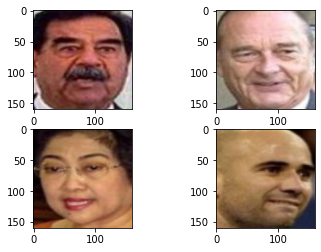

In [29]:
f, axarr = plt.subplots(2,2)
imgs = []
for i in range(4):
    index = np.random.randint(len(os.listdir('target/test/')),size = 1)
    img = cv2.imread(os.path.join('target/test/',os.listdir('target/test/')[index.item()]))
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(frame)

axarr[0,0].imshow(imgs[0])
axarr[0,1].imshow(imgs[1])
axarr[1,0].imshow(imgs[2])
axarr[1,1].imshow(imgs[3])

In [30]:
os.mkdir('train')
import shutil
for img_dir in list(os.listdir('target/train/')):
    if '.jpg' in img_dir:
        src = os.path.join('target/train/',img_dir)
        dst = os.path.join('train/',img_dir)
        shutil.copyfile(src,dst)

os.mkdir('test')
for img_dir in list(os.listdir('target/test/')):
    if '.jpg' in img_dir:
        src = os.path.join('target/test/',img_dir)
        dst = os.path.join('test/',img_dir)
        shutil.copyfile(src,dst)
os.mkdir('val')
for img_dir in list(os.listdir('target/val/')):
    if '.jpg' in img_dir:
        src = os.path.join('target/val/',img_dir)
        dst = os.path.join('val/',img_dir)
        shutil.copyfile(src,dst)